<h2>Introduction</h2>

Run this cell to set everything up!

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

book_sales = pd.read_csv(
    'book_sales.csv',
    index_col='Date',
    parse_dates=['Date'],
).drop('Paperback', axis=1)
book_sales['Time'] = np.arange(len(book_sales.index))
book_sales['Lag_1'] = book_sales['Hardcover'].shift(1)
book_sales = book_sales.reindex(columns=['Hardcover', 'Time', 'Lag_1'])
print(book_sales.head())
ar = pd.read_csv('ar.csv')

dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}
store_sales = pd.read_csv(
    'train.csv',
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)
store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']

            Hardcover  Time  Lag_1
Date                              
2000-04-01        139     0    NaN
2000-04-02        128     1  139.0
2000-04-03        172     2  128.0
2000-04-04        139     3  172.0
2000-04-05        191     4  139.0


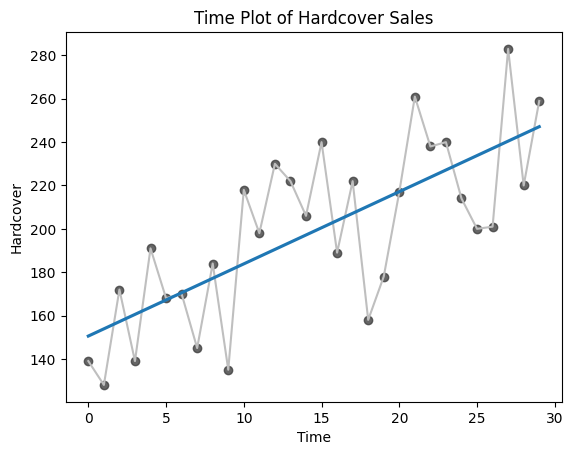

In [7]:
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=book_sales, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=book_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

<h3>1) Interpret linear regression with the time dummy</h3>

The linear regression line has an equation of (approximately) `Hardcover = 3.33 * Time + 150.5`. Over 6 days how much on average would you expect hardcover sales to change? After you've thought about it, run the next cell.

A change of 6 steps in Time corresponds to an average change of 6 * 3.33 = 19.98 in Hardcover sales.

<h3>2) Interpret linear regression with a lag feature</h3>

Run the following cell to see two series generated according to the model just described.

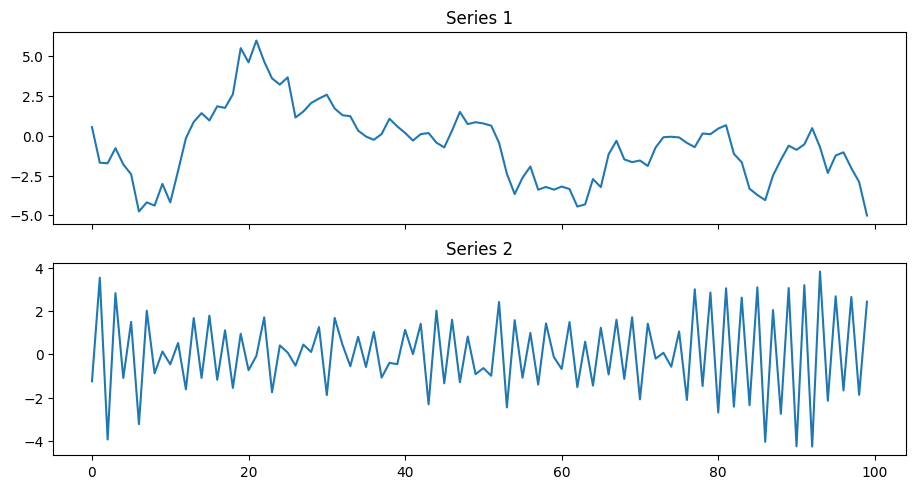

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5.5), sharex=True)
ax1.plot(ar['ar1'])
ax1.set_title('Series 1')
ax2.plot(ar['ar2'])
ax2.set_title('Series 2');

One of these series has the equation target = 0.95 * lag_1 + error and the other has the equation target = -0.95 * lag_1 + error, differing only by the sign on the lag feature. Can you tell which equation goes with each series?

Series 1 was generated by target = 0.95 * lag_1 + error and Series 2 was generated by target = -0.95 * lag_1 + error. (The series with the 0.95 weight will tend to have values with signs that stay the same. The series with the -0.95 weight will tend to have values with signs that change back and forth.)

Now we'll get started with the Store Sales - Time Series Forecasting competition data. The entire dataset comprises almost 1800 series recording store sales across a variety of product families from 2013 into 2017. For this lesson, we'll just work with a single series (average_sales) of the average sales each day.

<h3>3) Fit a time-step feature</h3>

Complete the code below to create a linear regression model with a time-step feature on the series of average product sales. The target is in a column called 'sales'.

In [11]:
from sklearn.linear_model import LinearRegression

df = average_sales.to_frame()

# YOUR CODE HERE: Create a time dummy
time = np.arange(len(df.index))  # time dummy

df['time'] = time 

# YOUR CODE HERE: Create training data
X = df.loc[:, ['time']]  # features
y = df.loc[:, 'sales']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

<h3>4) Fit a lag feature to Store Sales</h3>

Complete the code below to create a linear regression model with a lag feature on the series of average product sales. The target is in a column of df called 'sales'.

In [12]:
df = average_sales.to_frame()

lag_1 = df['sales'].shift(1)

df['lag_1'] = lag_1

X = df.loc[:, ['lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'sales']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)